# Digital Image Processing
## Spring 2024 Assignment 1
## Aisha Muhammad Nawaz (L20-0921)
##   BSCS 6B
### Instructions:  
#### You are required to code the following algorithms using Matlab/Python languages. Proper GUI, where all relevant inputs are taken from the user and appropriate outputs are shown accordingly:

1. Mapping Equations (Linear and Non-linear), user should be given choice to select ranges for input;
2. Digital negative;
3. Histogram Stretch and Shrink.

Visit your book/handouts and attend lectures for better understanding of problems.

### NOTE: I am using Python Language
# Part 1 : Mapping Equations (Linear and Non-linear)

## (a) : Mapping Equations (Linear)

In [1]:
# Part 1 (a) : Mapping Equations (Linear)
import cv2
import matplotlib.pyplot as plt
import numpy as np

def MapImageLinear(OrgImg):
    img=OrgImg.copy()
    print('Please enter Original Gray Level Range (Seperate start and end by \'-\')')
    x1,x2=input().split('-')
    print('Please enter Transformed Gray Level Range (Seperate start and end by \'-\')')
    y1,y2=input().split('-')
    x1=int(x1)
    y1=int(y1)
    x2=int(x2)
    y2=int(y2)
    #Finding Equation y=mx+c     
    m=(y1-y2)/(x1-x2)
    print('m is: ',m)
    if 0 < m < 1:
        print('Need to shrink')     
    elif(m>1):
        print('Need to strech')
    else:
        print('Do Nothing')
        
    # Finding value of C
    c=y2-m*x2
    print('C is: ',c)
    # y=mx+c
    #Applying Linear Mapping   
    # Creating a mask based on the original gray level range
    mask = (x1 <= img) & (img <= x2)
    
    # Applying Linear Mapping only to the pixels in the mask
    img[mask] = m * img[mask] + c
               
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(OrgImg,cv2.COLOR_BGR2RGB))
    plt.title("Orginal Image")
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title("Image After Linear Mapping")

Please enter Original Gray Level Range (Seperate start and end by '-')
28-75
Please enter Transformed Gray Level Range (Seperate start and end by '-')
28-255
m is:  4.829787234042553
Need to strech
C is:  -107.23404255319144


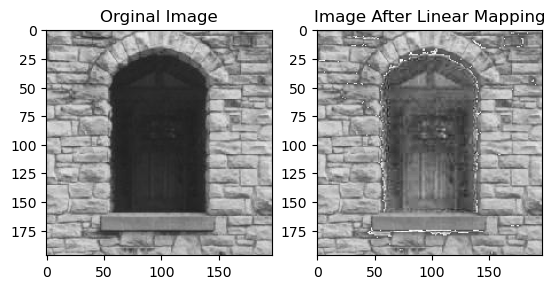

In [2]:
img=cv2.imread('TestImage_1a.png') 
MapImageLinear(img) #Sample input 28-75 then 28-255

## (b) : Mapping Equations (Non-Linear)

In [3]:
# Part 1 (b) : Mapping Equations (Non-linear)
import cv2
import matplotlib.pyplot as plt
import numpy as np

def MapImageNonLinear(OrgImg):
    img=OrgImg.copy()
    #Using Piece-wise linear modification     
    ranges=[]
    n=int(input('Please enter the number of ranges you wish to specify: '))
    for i in range (n):
        print(f'Please enter range {i+1} (start,end,modifiedStart,modifiedEnd)')
        ranges.append(map(int,input().split(',')))
    
    #Finding Equation y=mx+c     
    for start,end,modifiedStart,modifiedEnd in ranges:     
        m = (modifiedEnd - modifiedStart) / (end - start)
        print('m is',m)
        if(m>1):
            print('Need to strech')
        elif(m<1):
            print('Need to shrink')
        else:
            print('Do Nothing')
        
        # Finding values of C
        c=modifiedEnd-m*end
        print('C is: ',c)
        
        mask=(img>=start) & (img<=end)
        img[mask]=m*img[mask]+c
    
        
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(OrgImg,cv2.COLOR_BGR2RGB))
    plt.title("Orginal Image")
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title("Image After Non-Linear Mapping")

Please enter the number of ranges you wish to specify: 2
Please enter range 1 (start,end,modifiedStart,modifiedEnd)
0,80,0,180
Please enter range 2 (start,end,modifiedStart,modifiedEnd)
80,255,180,255
m is 2.25
Need to strech
C is:  0.0
m is 0.42857142857142855
Need to shrink
C is:  145.71428571428572


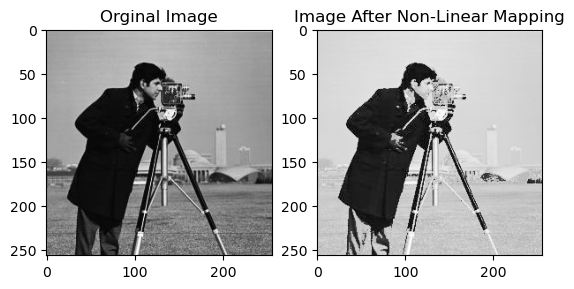

In [4]:
img=cv2.imread('TestImage_1b.png')
MapImageNonLinear(img) #Sample input 2 then 0,80,0,180 then 80,255,180,255

# Part 2 : Digital Negative

In [5]:
# Part 2 : Digital Negative
import cv2
import matplotlib.pyplot as plt
import numpy as np

def GetDigitalNegativeImage(img):
    
    digitalNegativeImage = np.max(img) - img #Subtracting the pixel values from the max gray value in image
    
    # Showing Original Image and Digital Negative Image Side by Side for comparison
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(digitalNegativeImage,cv2.COLOR_BGR2RGB))
    plt.title('Digital Negative Image')

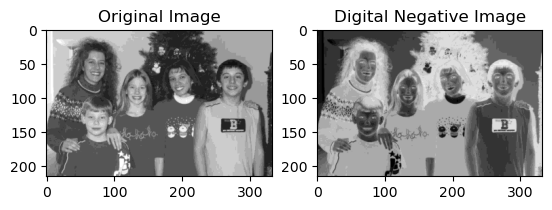

In [6]:
img=cv2.imread('TestImage_2.png') #Reading Test Image 
GetDigitalNegativeImage(img)

# Part 3 : Histrogram Stretch and Shrink
## (a) Strech

In [7]:
# Part 3 : Histrogram (a) Stretch

def HistogramStrech(img):
    MAX=int(input('Enter Desired Max Value '))/255
    MIN=int(input('Enter Desired Min Value '))/255
    imgNorm = img.astype(np.float32) / 255.0 #To Ensure img has float values in the range [0, 1]
    stImg=((imgNorm-np.min(imgNorm))/(np.max(imgNorm)-np.min(imgNorm)))*(MAX-MIN)+MIN
    stImg = (stImg * 255).astype(np.uint8) #Convert back to org type
    # Showing Original Image and streched Image Side by Side for comparison
    fig = plt.figure(figsize=(12, 8))
    plt.subplot(221)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
   
    # Plotting the histogram
    plt.subplot(222)
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    plt.plot(hist, color='black')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Original Image Histogram')
    plt.show()
    
    fig = plt.figure(figsize=(12, 8))
    plt.subplot(223)
    plt.imshow(cv2.cvtColor(stImg,cv2.COLOR_BGR2RGB))
    plt.title('Streched Image')
    
    plt.subplot(224)
    hist, bins = np.histogram(stImg.flatten(), 256, [0, 256])
    plt.plot(hist, color='black')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Streched Image Histogram')
    plt.tight_layout()
    plt.show()

Enter Desired Max Value 255
Enter Desired Min Value 0


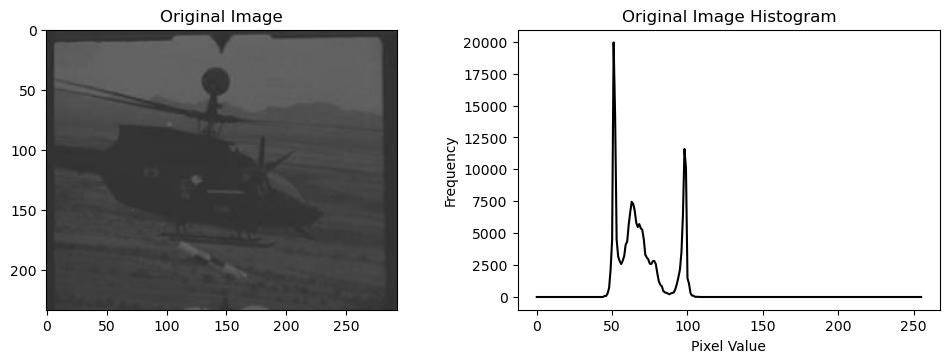

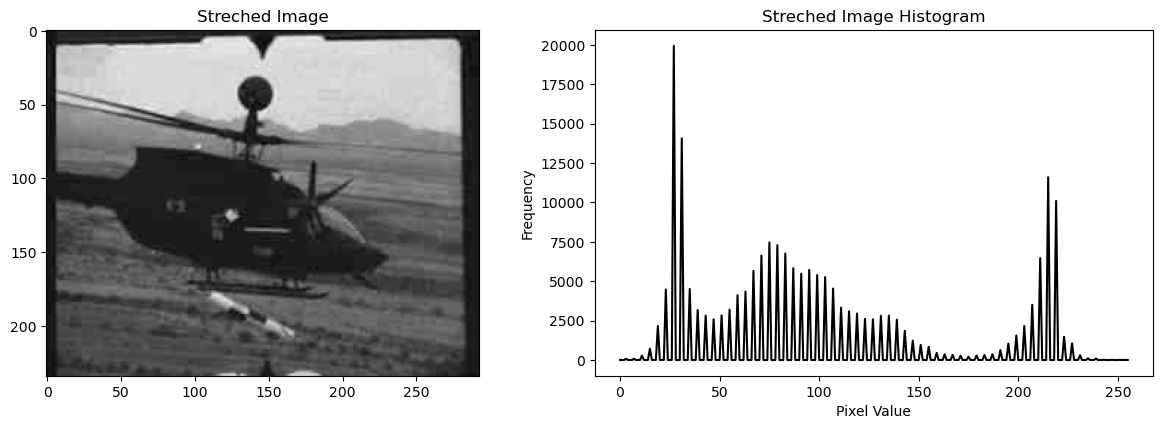

In [8]:
img=cv2.imread('TestImage_3a.png') #Reading Test Image 
HistogramStrech(img) #sample input 255 and 0

## (b) Shrink

In [9]:
# Part 3 : Histrogram (b) Shrink

def HistogramShrink(img):
    MAX=int(input('Enter Desired Max Value '))/255
    MIN=int(input('Enter Desired Min Value '))/255
    imgNorm = img.astype(np.float32) / 255.0 #To Ensure img has float values in the range [0, 1]
    shImg=((MAX-MIN)/(np.max(imgNorm)-np.min(imgNorm)))*(imgNorm-np.min(imgNorm))+MIN
    shImg = (shImg * 255).astype(np.uint8) #Convert back to org type
    # Showing Original Image and Shrunken Image Side by Side for comparison
    fig = plt.figure(figsize=(12, 8))
    plt.subplot(221)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
   
    # Plotting the histogram
    plt.subplot(222)
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    plt.plot(hist, color='black')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Original Image Histogram')
    plt.show()
    
    fig = plt.figure(figsize=(12, 8))
    plt.subplot(223)
    plt.imshow(cv2.cvtColor(shImg,cv2.COLOR_BGR2RGB))
    plt.title('Shrunken Image')
    
    plt.subplot(224)
    hist, bins = np.histogram(shImg.flatten(), 256, [0, 256])
    plt.plot(hist, color='black')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Shrunken Image Histogram')
    plt.tight_layout()
    plt.show()

Enter Desired Max Value 175
Enter Desired Min Value 75


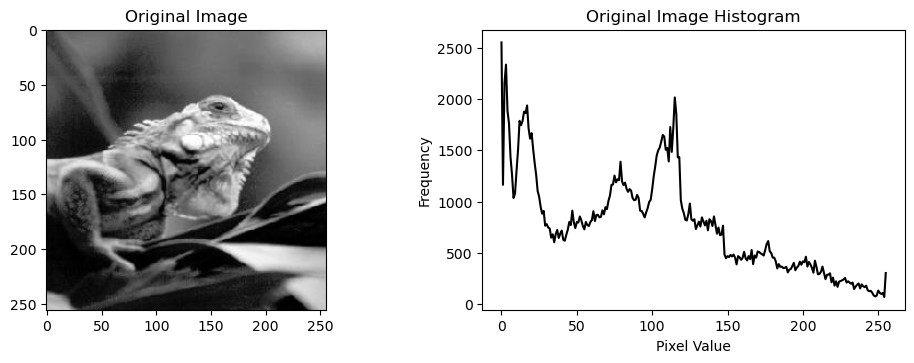

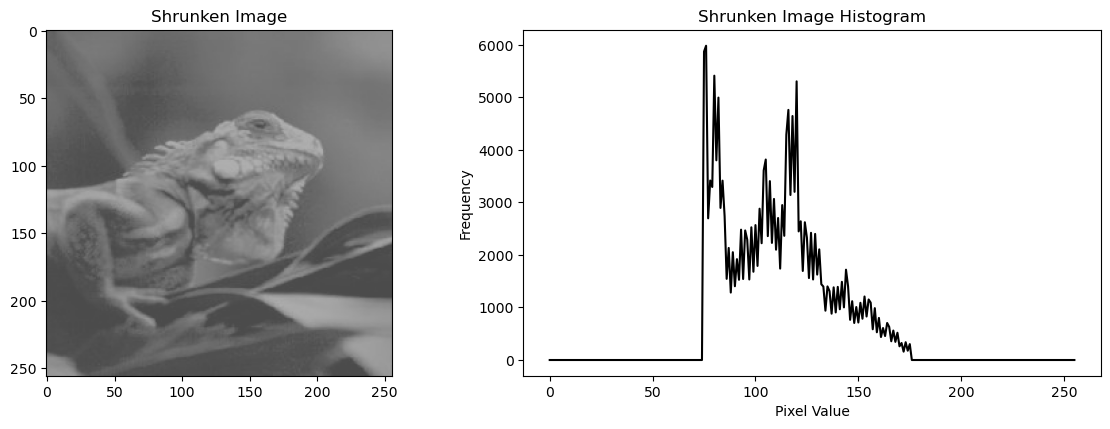

In [10]:
img=cv2.imread('TestImage_3b.png') #Reading Test Image 
HistogramShrink(img) #Sample input 175 & 75

# FINAL GUI

Enter Original Gray Level Range (start-end): 28-75
Enter Transformed Gray Level Range (start-end): 28-255


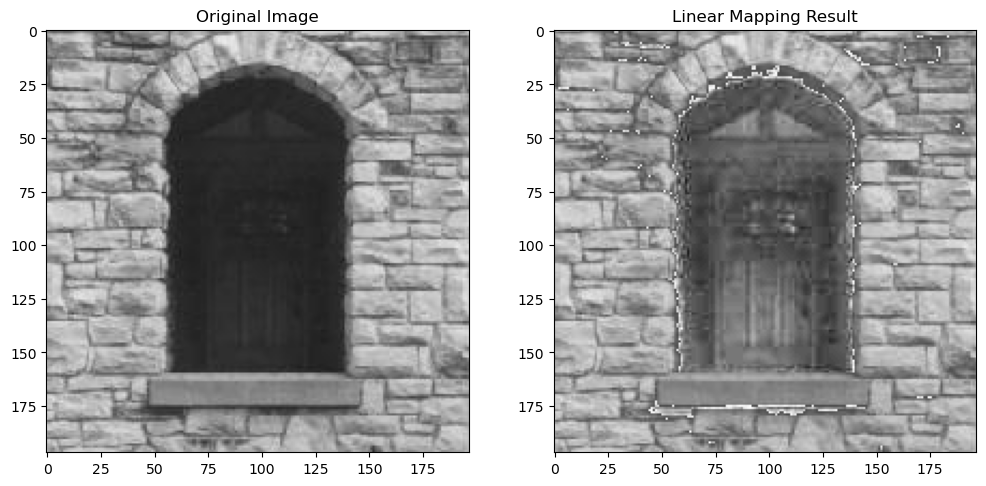

Enter the number of ranges you wish to specify: 2
Enter range 1 (start,end,modifiedStart,modifiedEnd): 0,80,0,180
Enter range 2 (start,end,modifiedStart,modifiedEnd): 80,255,180,255


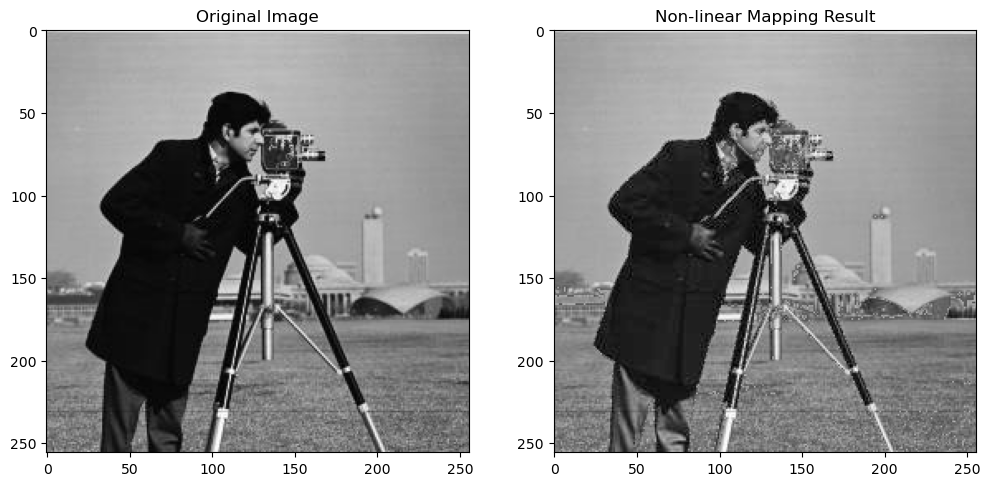

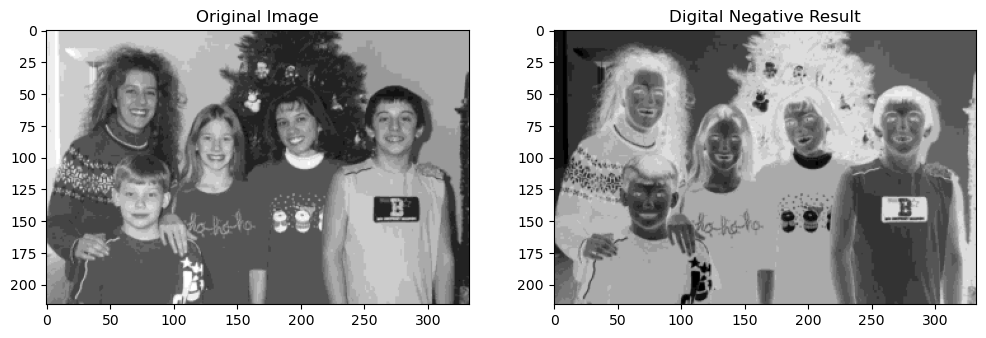

Enter Desired Max Value 255
Enter Desired Min Value 0


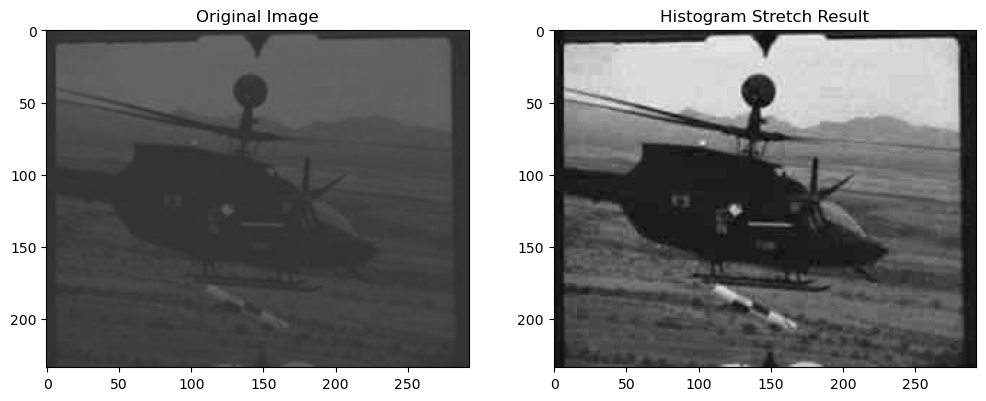

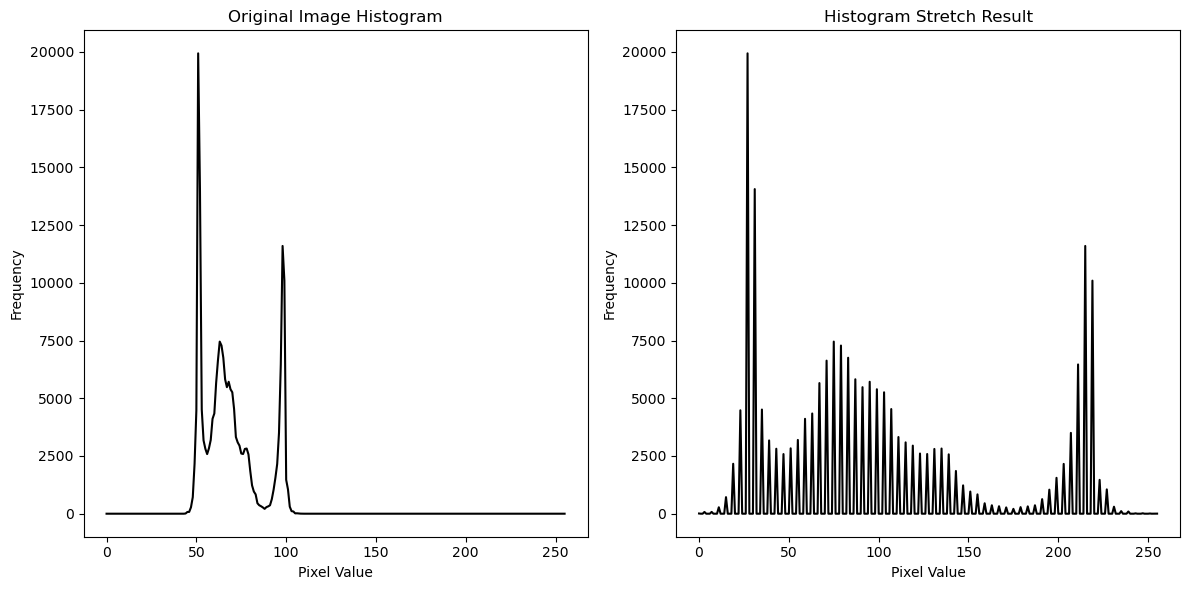

Enter Desired Max Value 175
Enter Desired Min Value 75


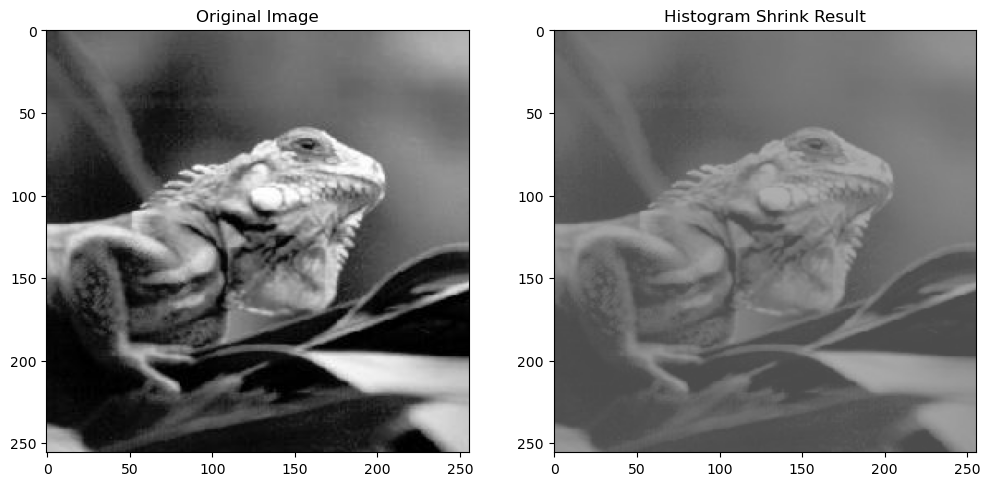

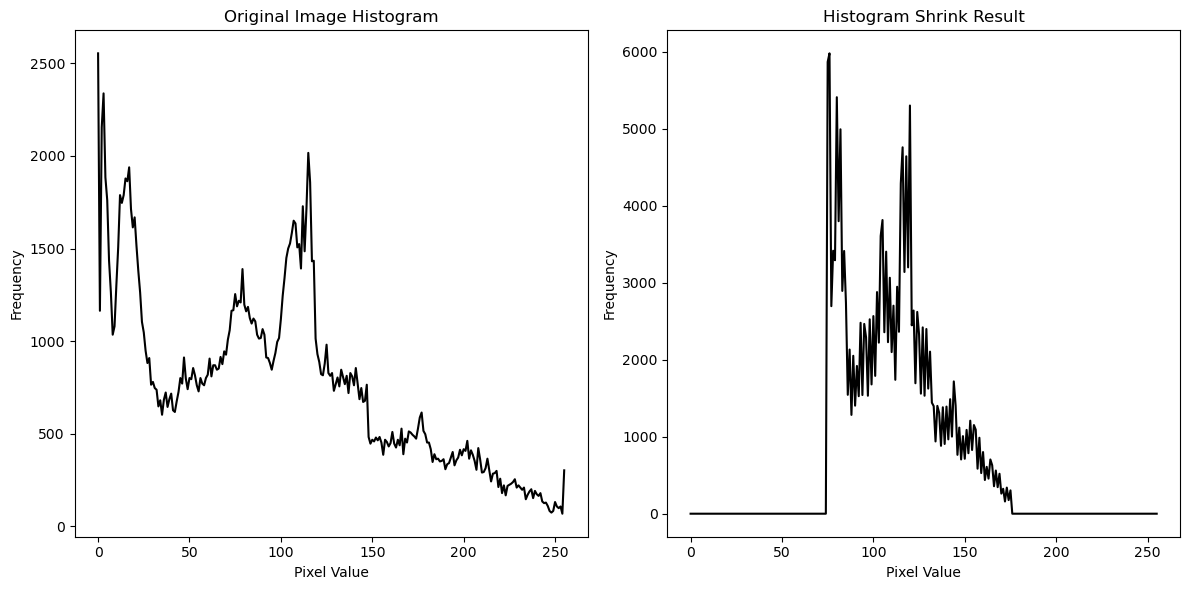

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, Label, Button, filedialog

class ImageProcessorGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Image Processor")

        self.img = None

        self.label = Label(root, text="Choose an image:")
        self.label.pack()

        self.button_open = Button(root, text="Open Image", command=self.open_image)
        self.button_open.pack()

        self.button_linear_map = Button(root, text="Linear Mapping", command=self.linear_mapping)
        self.button_linear_map.pack()

        self.button_nonlinear_map = Button(root, text="Non-linear Mapping", command=self.nonlinear_mapping)
        self.button_nonlinear_map.pack()

        self.button_digital_negative = Button(root, text="Digital Negative", command=self.digital_negative)
        self.button_digital_negative.pack()

        self.button_hist_stretch = Button(root, text="Histogram Stretch", command=self.histogram_stretch)
        self.button_hist_stretch.pack()

        self.button_hist_shrink = Button(root, text="Histogram Shrink", command=self.histogram_shrink)
        self.button_hist_shrink.pack()

    def open_image(self):
        file_path = filedialog.askopenfilename()
        if file_path:
            self.img = cv2.imread(file_path)

    def linear_mapping(self):
        if self.img is not None:
            self.show_images("Linear Mapping Result",self.map_image_linear())

    def nonlinear_mapping(self):
        if self.img is not None:
            self.show_images("Non-linear Mapping Result",self.map_image_nonlinear())

    def digital_negative(self):
        if self.img is not None:
            self.show_images("Digital Negative Result",self.get_digital_negative())

    def histogram_stretch(self):
        if self.img is not None:
            res=self.stretch_histogram()
            self.show_images("Histogram Stretch Result",res)
            self.show_histograms("Histogram Stretch Result",res)

    def histogram_shrink(self):
        if self.img is not None:
            res=self.shrink_histogram()
            self.show_images("Histogram Shrink Result",res)
            self.show_histograms("Histogram Shrink Result",res)

    def map_image_linear(self):
        NewImg=self.img.copy()
        x1, x2 = map(int, input("Enter Original Gray Level Range (start-end): ").split('-'))
        y1, y2 = map(int, input("Enter Transformed Gray Level Range (start-end): ").split('-'))

        m = (y1 - y2) / (x1 - x2)
        c = y2 - m * x2

        mask = (x1 <= self.img) & (self.img <= x2)
        NewImg[mask] = m * self.img[mask] + c
        return NewImg

    def map_image_nonlinear(self):
        NewImg=self.img.copy()
        n = int(input("Enter the number of ranges you wish to specify: "))
        ranges = []

        for i in range(n):
            start, end, modified_start, modified_end = map(int, input(f"Enter range {i + 1} (start,end,modifiedStart,modifiedEnd): ").split(','))
            ranges.append((start, end, modified_start, modified_end))

        for start, end, modified_start, modified_end in ranges:
            m = (modified_end - modified_start) / (end - start)
            c = modified_end - m * end

            mask = (self.img >= start) & (self.img <= end)
            NewImg[mask] = m * self.img[mask] + c
            return NewImg

    def get_digital_negative(self):
        return np.max(self.img) - self.img #Subtracting the pixel values from the max gray value in image

    def stretch_histogram(self):
        MAX=int(input('Enter Desired Max Value '))/255
        MIN=int(input('Enter Desired Min Value '))/255
        imgNorm = self.img.astype(np.float32) / 255.0 #To Ensure img has float values in the range [0, 1]
        stImg=((imgNorm-np.min(imgNorm))/(np.max(imgNorm)-np.min(imgNorm)))*(MAX-MIN)+MIN
        stImg = (stImg * 255).astype(np.uint8) #Convert back to org type        return sh_img.astype(np.uint8)
        return stImg

    def shrink_histogram(self):
        MAX=int(input('Enter Desired Max Value '))/255
        MIN=int(input('Enter Desired Min Value '))/255
        imgNorm = self.img.astype(np.float32) / 255.0 #To Ensure img has float values in the range [0, 1]
        shImg=((MAX-MIN)/(np.max(imgNorm)-np.min(imgNorm)))*(imgNorm-np.min(imgNorm))+MIN
        shImg = (shImg * 255).astype(np.uint8) #Convert back to org type

        return shImg

    def show_images(self, title,newImg):
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plt.imshow(cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")

        plt.subplot(122)
        plt.imshow(cv2.cvtColor(newImg, cv2.COLOR_BGR2RGB))
        plt.title(title)

        plt.show()

    def show_histograms(self, title,newImg):
        fig = plt.figure(figsize=(12, 6))

        plt.subplot(121)
        hist, bins = np.histogram(self.img.flatten(), 256, [0, 256])
        plt.plot(hist, color='black')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.title('Original Image Histogram')

        plt.subplot(122)
        hist, bins = np.histogram(newImg.flatten(), 256, [0, 256])
        plt.plot(hist, color='black')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.title(title)

        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    root = Tk()
    app = ImageProcessorGUI(root)
    root.mainloop()